In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 1.7 MB 46.5 MB/s 
     |████████████████████████████████| 5.9 MB 48.8 MB/s 
     |████████████████████████████████| 438 kB 73.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 78382, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 78382 (delta 88), reused 172 (delta 84), pack-reused 78197
Receiving objects: 100% (78382/78382), 593.60 MiB | 32.35 MiB/s, done.
Resolving deltas: 100% (55711/55711), done.


In [4]:
pwd

'/content'

In [5]:
cd /content/models/research

/content/models/research


In [6]:
pwd

'/content/models/research'

In [7]:
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 32.98 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [11]:
cp -r pycocotools /content/models/research

In [12]:
cd ..

/content/models/research/cocoapi


In [13]:
cd .. 

/content/models/research


In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 50.2 MB/s 
     |████████████████████████████████| 352 kB 55.6 MB/s 
     |████████████████████████████████| 2.2 MB 62.7 MB/s 
     |████████████████████████████████| 25.0 MB 62.9 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 116 kB 50.4 MB/s 
     |████████████████████████████████| 38.2 MB 179 kB/s 
     |████████████████████████████████| 5.9 MB 59.9 MB/s 
     

In [16]:
!python object_detection/builders/model_builder_tf2_test.py

2022-11-02 12:04:57.028386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 12:04:57.212258: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 12:04:58.144929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-02 12:04:58.145106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

# **Object Detection**

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [18]:
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/exported_models/content/training_demo/exported_models/my_model'
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

In [19]:
IMAGE_PATHS = '/content/drive/MyDrive/OIP (4).jpg'
PATH_TO_LABELS = '/content/drive/MyDrive/label_map.pbtxt'


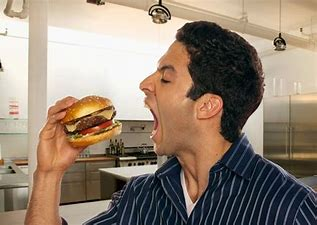

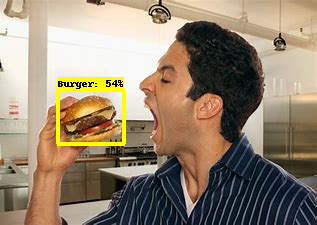

In [20]:
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis, ...]
detections = detect_fn(input_tensor)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
num_detections = int(detections.pop('num_detections'))

detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
image_with_detections = image.copy()
cv2_imshow(image_with_detections)
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

cv2_imshow(image_with_detections)

## **Testing**

In [40]:
def detect_crop_classify(path):
  IMAGE_PATHS=path
  image = cv2.imread(IMAGE_PATHS)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis, ...]
  detections = detect_fn(input_tensor)
  category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
  num_detections = int(detections.pop('num_detections'))

  detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
  detections['num_detections'] = num_detections
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
  image_with_detections = image.copy()
  print('Original Image')
  cv2_imshow(image_with_detections)
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.5,
        agnostic_mode=False)
  print('\n')
  print('Image after Object Detection')
  cv2_imshow(image_with_detections)
  

Original Image


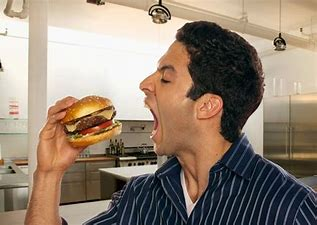



Image after Object Detection


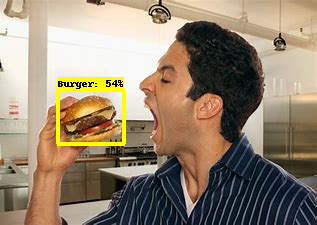

In [41]:
detect_crop_classify('/content/drive/MyDrive/OIP (4).jpg')

Original Image


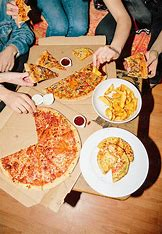



Image after Object Detection


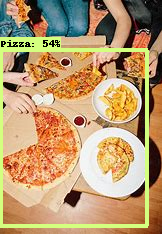

In [42]:
detect_crop_classify('/content/drive/MyDrive/OIP (9).jpg')

Original Image


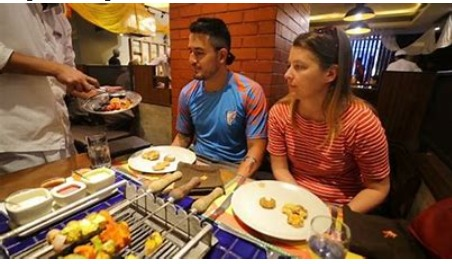



Image after Object Detection


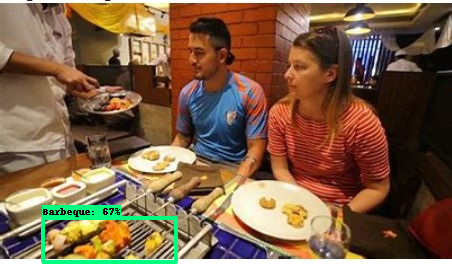

In [43]:
detect_crop_classify('/content/drive/MyDrive/bbq.jpeg')